## Logistic Regression Assignment-22072021-V0.2

### Assignment

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

### Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.



#### Description of Variables

##### The dataset contains 6366 observations of 9 variables:
     
rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)

age: woman's age

yrs_married: number of years married

children: number of children

religious: woman's rating of how religious she is (1 = not religious, 4     =strongly religious)

educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20  = advanced degree)

occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 =   teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)


occupation_husb: husband's occupation (same coding as above) 

affairs: time spent in extra-marital affairs


#### Task: Deploy this assignment in any cloud platform.(Try to look for free cloud platform)

#### Assignment: Submit assignment’s deployable link only.


#### Step 1 : Importing all the essential libraries and acquiring data set

In [63]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#from sklearn.cross_validation import cross_val_score 

dta = sm.datasets.fair.load_pandas().data

#add "affair" column: 1 represents having affairs, 0 represents not 

dta['affair'] = (dta.affairs > 0).astype(int)

y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', dta, return_type="dataframe")

X = X.rename(columns = 
{'C(occupation)[T.2.0]':'occ_2', 
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

#### Step 2 : Data Preprocessing

In [64]:
# Checking is there any null value present in dataset or not .

dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

In [65]:
# Now next step would be to check whether the dataset is balanced or not.

print(dta[dta["affair"]==0].shape)
print(dta[dta["affair"]==1].shape)

(4313, 10)
(2053, 10)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


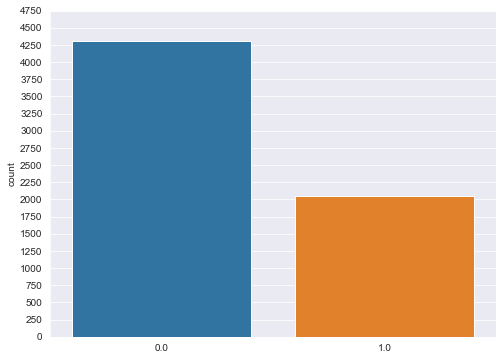

In [66]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

##### As we see the visual the dataset is imbalanced because class 0 is almost double of class 1 . 
we will do up sampling to balance the dataset.

In [67]:
#from imblearn.random_sampling  import RandomOverSampler
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler

X,y=rdm.fit_resample(X,y)
dta=pd.concat([X,y],axis=1)  #updating the balanced form of dataset
print(dta[dta["affair"]==0].shape)
print(dta[dta["affair"]==1].shape)




TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [68]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


##### Step 3 : Data Visualization

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


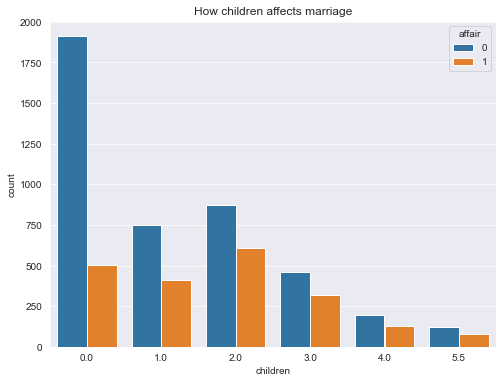

In [69]:
# How children affects the husband-wife relationship.

plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("children",data=dta,hue="affair")
plt.title("How children affects marriage")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


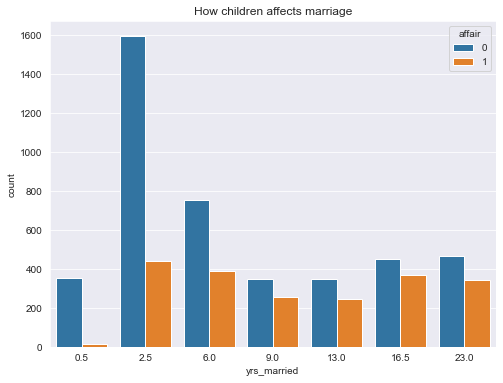

In [70]:
# How years of marriage affects extra married life.

plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("yrs_married",data=dta,hue="affair")
plt.title("How children affects marriage")
plt.show()

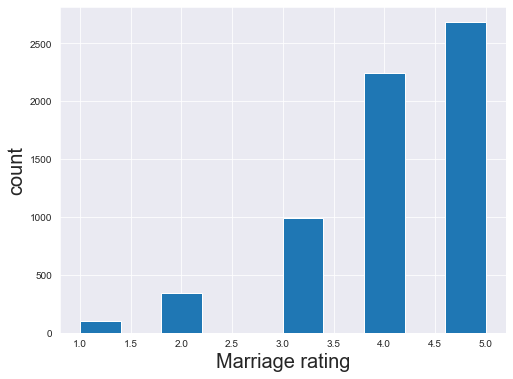

In [71]:
# How women rate their married life on a scale of 1 to 5.

plt.figure(figsize=(8,6))
plt.hist(dta["rate_marriage"])
plt.xlabel("Marriage rating",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


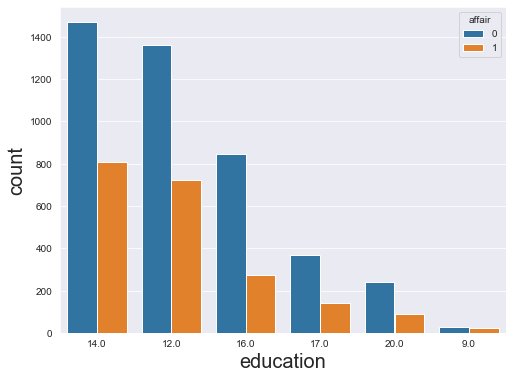

In [72]:
# Let’s see how education make an impact on married life

plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("educ",hue="affair",data=dta,order=dta["educ"].value_counts().index)
plt.xlabel("education",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


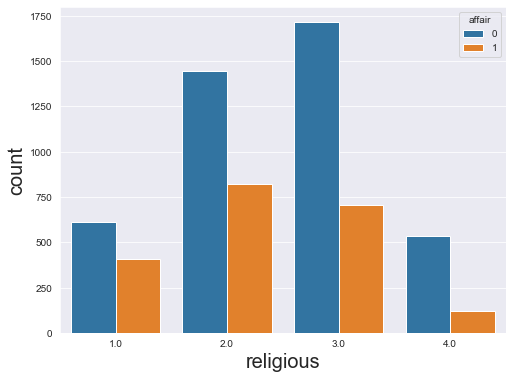

In [73]:
# How the marriage of women affect by religiousness

plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("religious",hue="affair",data=dta)
plt.xlabel("religious",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

##### Step 4 : Modeling

In [74]:
# splitting the data into train and test set

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6900, 17)
(6900,)
(1726, 17)
(1726,)


In [77]:
# Making model and doing prediction

clf=LogisticRegression(solver='lbfgs', max_iter=1000)
clf.fit(x_train,y_train)
y_predicted=clf.predict(x_test)
y_train_predicted=clf.predict(x_train)

##### Step 5 : Evaluation

In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,classification_report
print("train set accuracy score: ",accuracy_score(y_train,y_train_predicted))
print("test set accuracy score :",  accuracy_score(y_test,y_predicted))

train set accuracy score:  0.6820289855072463
test set accuracy score : 0.6825028968713789


##### As we see there is not large deviation between dataset hence model is in normal state.

Accuracy matrix to check TP ,TN ,FP ,FN values.

In [104]:
ax=metrics.plot_confusion_matrix(estimator=True,X=y_test,y_true=y_predicted)
plt.xlabel("Predicted label",fontsize=20)
plt.ylabel("True label",fontsize=20)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

ValueError: plot_confusion_matrix only supports classifiers

####  Finding Precision,Recall F1- Score

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       893
         1.0       0.68      0.66      0.67       833

    accuracy                           0.68      1726
   macro avg       0.68      0.68      0.68      1726
weighted avg       0.68      0.68      0.68      1726



##### ROC CURVE

In [98]:
from sklearn.metrics import plot_roc_curve
from sklearn import datasets, metrics, model_selection, svm
pred_probab=clf.predict_proba(x_test)
#metrics.plot_roc_curve(y_test,pred_probab)
metrics.plot_roc_curve(y_test, pred_probab)  

TypeError: plot_roc_curve() missing 1 required positional argument: 'y'

##### Final Testing of Model :

In [83]:
print("Prediction chance of your model :")
print(clf.predict_proba(np.array([[0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3,17]]))*100)

Prediction chance of your model :
[[58.66139238 41.33860762]]


In [84]:
print("your prediction is  :",clf.predict(np.array([[0,0,0,0,0,1,1,0,0,0,0,4,32,5,2,3,17]])))

your prediction is  : [0.]


Prediction result for given data is that the women doesn’t have affair.
Conclusion :
Hope this blog gave you better idea about how logistic regression works in classification problem . Keep Learning Keep Exploring ………